<a href="https://colab.research.google.com/github/NeomiSony/HobbyRecommendation/blob/main/HobbyRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
hb = pd.read_csv("Hobby.csv")

In [11]:
hb.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills,Hobby
0,5,8,8,6,8,1,2,1,2,1,Language Learning
1,6,9,9,5,9,2,1,3,1,2,Language Learning
2,1,1,1,7,1,8,8,1,1,1,Dance
3,2,2,3,6,2,9,9,2,2,3,Dance
4,1,1,1,1,1,1,8,8,1,1,Photography


In [12]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Time Management                8 non-null      int64 
 1   Listening Skills               8 non-null      int64 
 2   Reading comprehension          8 non-null      int64 
 3   Attention                      8 non-null      int64 
 4   Linguistic Intelligence        8 non-null      int64 
 5   Bodily kineastic intelligence  8 non-null      int64 
 6   Spatial awareness              8 non-null      int64 
 7   Creative thinking              8 non-null      int64 
 8   Self Confidence                8 non-null      int64 
 9   Communication Skills           8 non-null      int64 
 10  Hobby                          8 non-null      object
dtypes: int64(10), object(1)
memory usage: 832.0+ bytes


In [14]:

# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [15]:
hb.shape

(8, 11)

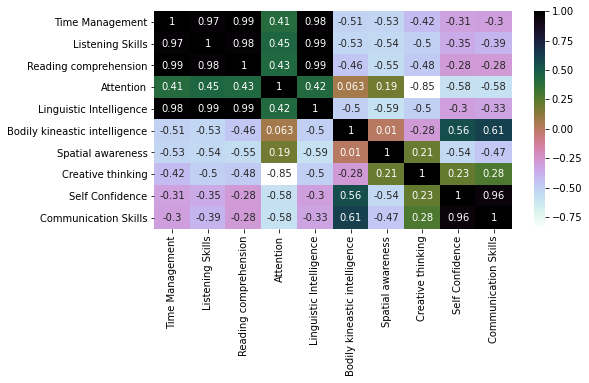

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(hb.corr(), annot=True, cmap='cubehelix_r') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

In [18]:
train, test = train_test_split(hb, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(5, 11)
(3, 11)


In [28]:
train_X = train[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills']] # taking the training data features
train_y = train.Hobby # output of the training data

test_X = test[['Time Management','Listening Skills','Reading comprehension','Attention','Linguistic Intelligence','Bodily kineastic intelligence','Spatial awareness','Creative thinking','Self Confidence','Communication Skills']] # taking test data feature
test_y = test.Hobby # output value of the test data

In [20]:
train_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills
2,1,1,1,7,1,8,8,1,1,1
7,2,1,3,2,2,9,2,5,6,9
0,5,8,8,6,8,1,2,1,2,1
5,2,1,2,3,1,2,9,9,2,3
4,1,1,1,1,1,1,8,8,1,1


In [21]:
test_X.head()

,Time Management,Listening Skills,Reading comprehension,Attention,Linguistic Intelligence,Bodily kineastic intelligence,Spatial awareness,Creative thinking,Self Confidence,Communication Skills
3,2,2,3,6,2,9,9,2,2,3
6,1,1,1,1,1,8,1,6,7,8
1,6,9,9,5,9,2,1,3,1,2


In [22]:
train_y.head()

2                Dance
7               Acting
0    Language Learning
5          Photography
4          Photography
Name: Hobby, dtype: object

In [23]:
model = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  1.0


In [32]:
new_input = [[2,2,3,6,2,9,9,2,2,3]]
# get prediction for new input
new_output = model.predict(new_input)
print(new_output)

['Acting']


In [24]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Logistic Regression is:  1.0


In [25]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.3333333333333333


In [26]:
model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.0
